In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns
import matplotlib as matplotlib

# Ecuaciones¶
Las ecuaciones de Lotka-Volterra son un modelo biomatemático que pretende responder a estas cuestiones prediciendo la dinámica de las poblaciones de presa y depredador bajo una serie de hipótesis:

El ecosistema está aislado: no hay migración, no hay otras especies presentes, no hay plagas...
La población de presas en ausencia de depredadores crece de manera exponencial: la velocidad de reproducción es proporcional al número de individuos. Las presas sólo mueren cuando son cazadas por el depredador.
La población de depredadores en ausencia de presas decrece de manera exponencial.
La población de depredadores afecta a la de presas haciéndola decrecer de forma proporcional al número de presas y depredadores (esto es como decir de forma proporcional al número de posibles encuentros entre presa y depredador).
La población de presas afecta a la de depredadores también de manera proporcional al número de encuentros, pero con distinta constante de proporcionalidad (dependerá de cuanto sacien su hambre los depredadores al encontrar una presa).
Se trata de un sistema de dos ecuaciones diferenciales de primer orden, acopladas, autónomas y no lineales:

$$ \frac{dx}{dt} = \alpha x - \beta x y $$$$ \frac{dy}{dt} = -\gamma y + \delta y x $$
donde x es el número de presas (cebras en nuestro caso) e y es el número de depredadores (leones). Los parámetros son constantes positivas que representan:

$\alpha$: tasa de crecimiento de las presas.
$\beta$: éxito en la caza del depredador.
$\gamma$: tasa de decrecimiento de los depredadores.
$\delta$: éxito en la caza y cuánto alimenta cazar una presa al depredador.

### Condiciones iniciales:
- a: (α) tasa de crecimiento de las presas.
- b: (β) éxito en la caza del depredador.
- c: (γ) tasa de decrecimiento de los depredadores.
- d: (δ) factor de proporcionalidad indica el grado en que afecta el éxito en la caza al crecimiento de la población de predadores.

In [2]:
a = 0.4
b = 0.37
c = 0.3
d = 0.05 

### Numero de iteraciones 

In [3]:
n = 1000

### Tiempos:
- To (tiempo inicial)
- Tf (tiempo final)

In [4]:
To = 0
Tf = 100

### Población:
- rabits (conejos)
- fox (zorros)

In [5]:
rabits = 3
fox = 1

Definimos la función que representará el sistema de ecuaciones en forma canónica para pasárselo a odeint:

In [6]:
def df_dt(x, t, a, b, c, d):
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    return np.array([dx, dy])

In [7]:
t = np.linspace(1, Tf, n)

Creamos un vector con el numero de conejos y zorros 

In [8]:
array = np.array([rabits, fox])

Resolvemos la ecuación:

In [9]:
solucion = odeint(df_dt, array, t, args=(a, b, c, d))

### Presentacion de datos 

In [10]:
lovka = pd.DataFrame({'Conejos': solucion[:, 0], 'Zorros': solucion[:, 1]})

In [32]:
lovka.head(10)

Conejos    Zorros
0  3.000000  1.000000
1  3.009747  0.985268
2  3.021143  0.970804
3  3.034176  0.956611
4  3.048836  0.942689
5  3.065115  0.929041
6  3.083009  0.915669
7  3.102512  0.902572
8  3.123622  0.889753
9  3.146339  0.877210

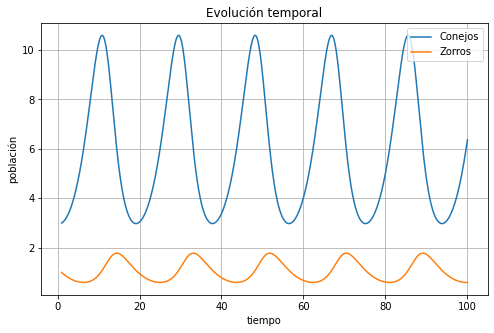

In [12]:
axb = plt.figure("Evolución temporal", figsize=(8,5))
axb = plt.title("Evolución temporal")
axb = plt.plot(t, solucion[:, 0], label='Conejos')
axb = plt.plot(t, solucion[:, 1], label='Zorros')
axb = plt.xlabel('tiempo')
axb = plt.ylabel('población')
axb = plt.grid(True)
axb = plt.legend()
axb = plt.savefig('figura1.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


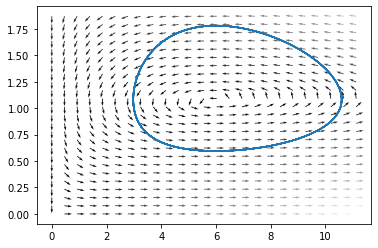

In [13]:
x_max = np.max(solucion[:,0]) * 1.05
y_max = np.max(solucion[:,1]) * 1.05
x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)
xx, yy = np.meshgrid(x, y)
uu, vv = df_dt((xx, yy), 0, a, b, c, d)
norm = np.sqrt(uu**2 + vv**2)
uu = uu / norm
vv = vv / norm
fg = plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
fg = plt.plot(solucion[:, 0], solucion[:, 1])
fg = plt.savefig('figura2.png')

Otra forma interesante de visualizar estos datos es ver el número de presas en función del número de depredadores en lugar de a lo largo del tiempo, es decir, podemos visualizar su mapa de fases:

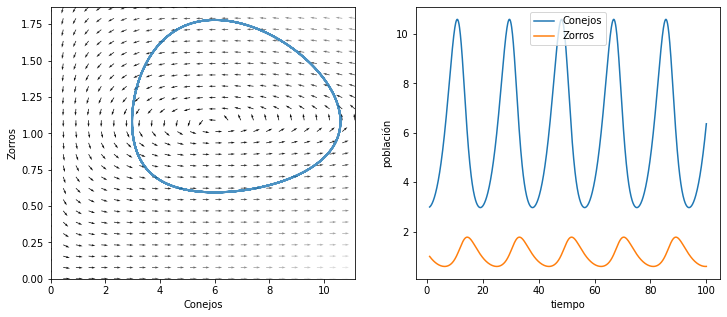

In [14]:
n_max = np.max(solucion) * 1.10
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,5)
#fig0
ax[0].quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
ax[0].plot(solucion[:, 0], solucion[:, 1], lw=2, alpha=0.8)
ax[0].set_xlim(0, x_max)
ax[0].set_ylim(0, y_max)
ax[0].set_xlabel('Conejos')
ax[0].set_ylabel('Zorros')
#fig1
ax[1].plot(t, solucion[:, 0], label='Conejos')
ax[1].plot(t, solucion[:, 1], label='Zorros')
ax[1].legend()
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('población')
plt.savefig('figura4.png')

Si nos fijamos en la línea azul, la coordenada x en cada punto indica el número de presas y la coordenada y el número de depredadores. La evolución a lo largo del tiempo que hemos representado antes, se obtiene al recorrer esta curva en sentido antihorario. Podemos ver también como el campo de direcciones nos señala la tendencia del sistema en cada situación. Por ejemplo, una flecha que apunta hacia arriba a la derecha indica que con ese número de cebras y leones en nuestra sabana, la tendencia será que aumenten ambos.

Llegados a este punto podemos preguntarnos qué habría ocurrido si el número inicial de cebras y leones hubiese sido otro. Como ya sabemos integrar ecuaciones diferenciales, bastaría con cambiar nuestra x0 e y0 y repetir el proceso (incluso podríamos hacer un widget interactivo). Sin embargo, se puede demostrar que a lo largo de las líneas del mapa de fases, como la que hemos pintado antes, se conserva la cantidad:

- 𝐶=𝛼ln𝑦−𝛽𝑦+𝛾ln𝑥−𝛿𝑥
 
Por tanto, pintando un contour de esta cantidad podemos obtener la solución para distintos valores iniciales del problema.

In [15]:
def C(x, y, a, b, c, d):
    return a * np.log(y) - b * y + c * np.log(x) - d * x

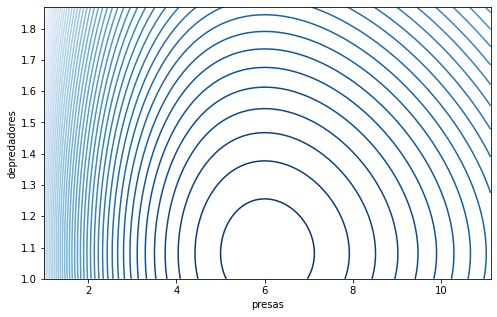

In [16]:
x = np.linspace(1, x_max, 100)
y = np.linspace(1, y_max, 100)
xx, yy = np.meshgrid(x, y)
constant = C(xx, yy, a, b, c, d)

plt.figure('distintas_soluciones', figsize=(8,5))
plt.contour(xx, yy, constant, 50, cmap=plt.cm.Blues)
plt.xlabel('presas')
plt.ylabel('depredadores')
plt.savefig('figura5.png')

## METODO DE EULER

In [17]:
h = (Tf-To)/n

In [18]:
R = np.zeros(n)
F = np.zeros(n)

In [19]:
"""
R[0] = rabits
F[0] = fox
for i in range(1, n):
    R[i] = R[i-1] + (h * R[i-1]) * (a - b * F[i-1])
    F[i] = F[i-1] + (h * F[i-1]) * (-c + d * R[i-1])
"""

'\nR[0] = rabits\nF[0] = fox\nfor i in range(1, n):\n    R[i] = R[i-1] + (h * R[i-1]) * (a - b * F[i-1])\n    F[i] = F[i-1] + (h * F[i-1]) * (-c + d * R[i-1])\n'

In [20]:
R[0] = rabits
F[0] = fox
for i in range(1, n):
    R[i] = (R[i-1] + h *(a * R[i-1]  - b * R[i-1] * F[i-1])) 
    F[i] = (F[i-1] + h * (- c * F[i-1] + d * R[i-1] * F[i-1]))

In [21]:
T = np.linspace(1, Tf, n)

### Presentacion de datos 

In [22]:
euler = pd.DataFrame({'Conejos': R, 'Zorros': F})

In [23]:
euler.head(10)

Conejos    Zorros
0  3.000000  1.000000
1  3.009000  0.985000
2  3.019697  0.970269
3  3.032078  0.955811
4  3.046132  0.941627
5  3.061849  0.927720
6  3.079223  0.914091
7  3.098248  0.900742
8  3.118922  0.887673
9  3.141241  0.874886

In [24]:
data = pd.DataFrame({'Tiempo': t ,'Conejos': solucion[:,0], 'Zorros': solucion[:,1], 'Conejos_e': R, 'Zorros_e': F })

In [25]:
data.head(10)

Tiempo   Conejos    Zorros  Conejos_e  Zorros_e
0  1.000000  3.000000  1.000000   3.000000  1.000000
1  1.099099  3.009747  0.985268   3.009000  0.985000
2  1.198198  3.021143  0.970804   3.019697  0.970269
3  1.297297  3.034176  0.956611   3.032078  0.955811
4  1.396396  3.048836  0.942689   3.046132  0.941627
5  1.495495  3.065115  0.929041   3.061849  0.927720
6  1.594595  3.083009  0.915669   3.079223  0.914091
7  1.693694  3.102512  0.902572   3.098248  0.900742
8  1.792793  3.123622  0.889753   3.118922  0.887673
9  1.891892  3.146339  0.877210   3.141241  0.874886

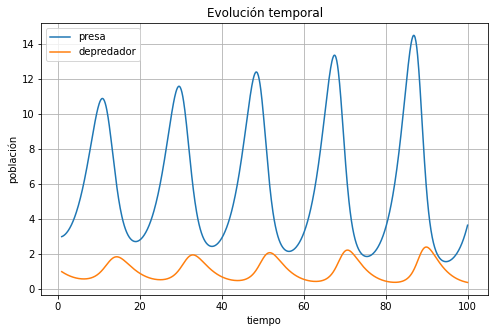

In [34]:
bx = plt.figure("Evolución temporal", figsize=(8,5))
bx = plt.title("Evolución temporal")
bx = plt.plot(T, R, label='presa')
bx = plt.plot(T, F, label='depredador')
bx = plt.xlabel('tiempo')
bx = plt.ylabel('población')
bx = plt.grid(True)
bx = plt.legend()
bx = plt.savefig('figura1_euler.png')

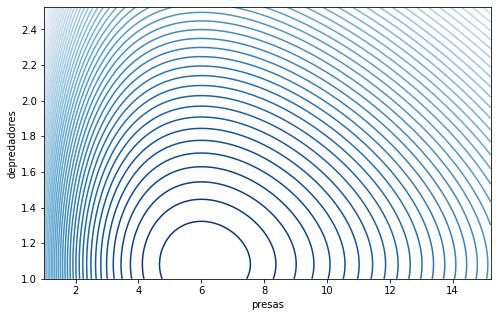

In [27]:
x_max2 = np.max(R) * 1.05
y_max2 = np.max(F) * 1.05
x2 = np.linspace(1, x_max2, 100)
y2 = np.linspace(1, y_max2, 100)
xx, yy = np.meshgrid(x2, y2)
constant = C(xx, yy, a, b, c, d)
hj = plt.figure('distintas_soluciones', figsize=(8,5))
hj = plt.contour(xx, yy, constant, 50, cmap=plt.cm.Blues)
hj = plt.xlabel('presas')
hj = plt.ylabel('depredadores')
hj = plt.savefig('figura2_euler.png')

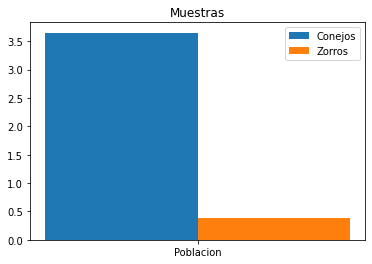

In [28]:
labels = ['Poblacion']

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, R[n-1], width, label='Conejos')
rects2 = ax.bar(x + width/2, F[n-1], width, label='Zorros')

ax.set_title('Muestras')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
#plt.savefig('presa_igual_depredador.png')

plt.show()